In [597]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from PIL import Image
import pickle

In [598]:
digits_db = load_digits()
print(digits_db.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [599]:
digits_db.data, digits_db.data.shape

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 (1797, 64))

In [600]:
digits_db.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [601]:
digits_db.images.shape

(1797, 8, 8)

In [602]:
digits_db.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [603]:
my_image = digits_db.images[0]

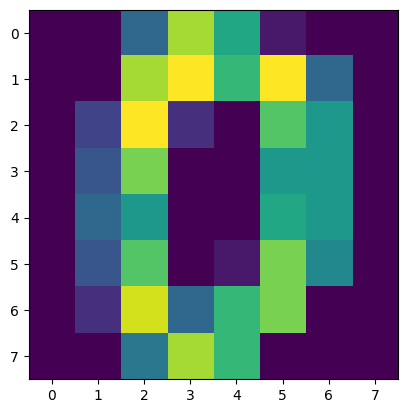

In [604]:
plt.imshow(my_image)

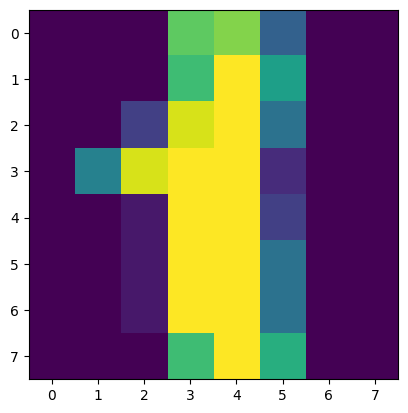

In [605]:
plt.imshow(digits_db.images[1])

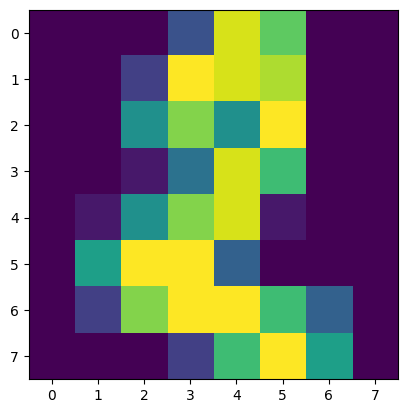

In [606]:
plt.imshow(digits_db.images[2])

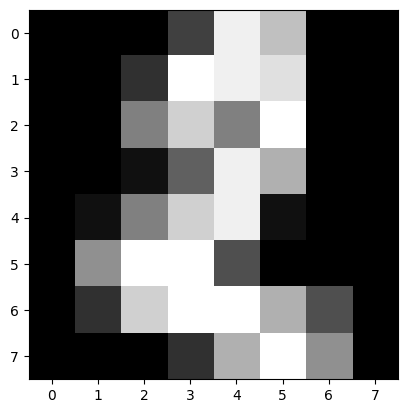

In [607]:
plt.imshow(digits_db.images[2], cmap="grey")

In [608]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [609]:
digits_db.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [610]:
feature_train, feature_test, target_train, target_test = train_test_split(digits_db.data, digits_db.target, test_size=0.2)
feature_train.shape, feature_test.shape, target_train.shape, target_test .shape

((1437, 64), (360, 64), (1437,), (360,))

In [611]:
model.fit(feature_train, target_train)

KNeighborsClassifier()

In [612]:
target_prezis = model.predict(feature_test)

In [613]:
pd.DataFrame({"y_prezis":target_prezis, "y_real":target_test})

,y_prezis,y_real
0,3,3
1,9,9
2,4,4
3,9,9
4,6,6
...,...,...
355,0,0
356,3,3
357,6,6
358,6,6


In [614]:
imagine_robert = feature_test[245]

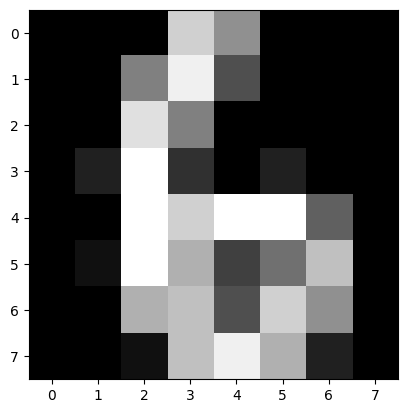

In [615]:
plt.imshow(imagine_robert.reshape(8, 8), cmap="grey")

In [616]:
target_test[245]

6

In [617]:
model.predict([imagine_robert])

array([6])

In [618]:
imagine_kleki = Image.open("9.png")
imagine_kleki

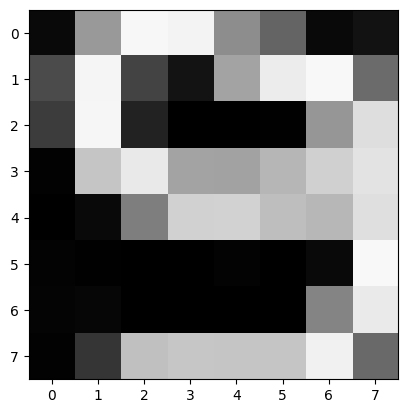

In [619]:
plt.imshow(imagine_kleki)

In [620]:
imagine_kleki = imagine_kleki.convert("L") ##Grayscale pentru a scoate RGB

In [621]:
imagine_kleki_np_array = np.array(imagine_kleki)

In [622]:
imagine_kleki_np_array.shape

(8, 8)

In [623]:
imagine_kleki_np_array

array([[  9, 153, 247, 243, 141, 100,   9,  18],
       [ 75, 245,  67,  19, 163, 236, 248, 107],
       [ 60, 246,  34,   0,   0,   1, 150, 222],
       [  2, 197, 233, 163, 162, 182, 208, 227],
       [  0,   9, 126, 209, 210, 190, 183, 223],
       [  3,   1,   0,   0,   3,   0,   9, 248],
       [  4,   6,   0,   0,   0,   0, 132, 234],
       [  2,  53, 192, 198, 197, 197, 241, 105]], dtype=uint8)

In [624]:
image_kleki_to_predict = np.concatenate(imagine_kleki_np_array)

In [625]:
model.predict([image_kleki_to_predict])

array([9])

In [ ]:
with open("model_digits.pkl", "wb") as fwriter:
    pickle.dump(model, fwriter)